In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

,HIT-HC,HIT-LC,MISS-LC,MISS-HC,FA-HC,FA-LC,CR-LC,CR-HC
0,0.670455,0.140152,0.106061,0.083333,0.030303,0.094697,0.344697,0.530303
1,0.431818,0.291667,0.143939,0.132576,0.071970,0.287879,0.314394,0.325758
2,0.609848,0.140152,0.140152,0.109848,0.022727,0.079545,0.306818,0.590909
3,0.696970,0.007576,0.018939,0.276515,0.132576,0.015152,0.037879,0.814394
4,0.469697,0.215909,0.068182,0.246212,0.056818,0.189394,0.106061,0.647727


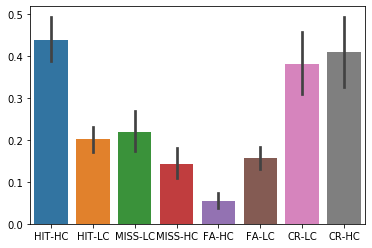

In [3]:
### Prob.7~9 ###
def file_location_ver1(loc) :
    file_list = os.listdir(loc)
    # Create empty old / new dictionary
    Sort_new = {'FA-HC' : [], 'FA-LC' : [], 'CR-LC' : [], 'CR-HC' :[]}
    Sort_old = {'HIT-HC' : [] , 'HIT-LC' : [] , 'MISS-LC' : [], 'MISS-HC' : []}
    keys_old = np.array(list(Sort_old.keys()))
    keys_new = np.array(list(Sort_new.keys()))

    for i in range(len(file_list)) :
        # Call the test.txt file by using format
        test = pd.read_csv('{}/{}/{}_test.txt'.format(loc,file_list[i],file_list[i]), sep='\t', index_col = False)
        
        # Split it into old and new
        old = test[test['Task_Type']==0]
        new = test[test['Task_Type']==1]
        #Fill in the dict with proper probability values
        old_case = []
        new_case = []
        for t in range(4) :
            old_case.append(len(old[old['Res1']==t+1]))
            new_case.append(len(new[new['Res1']==t+1]))
            Sort_old[keys_old[t]].append(old_case[t]/len(old))
            Sort_new[keys_new[t]].append(new_case[t]/len(new))
    
    # Merge old / new dictionary and change into DataFrame
    Sort_all = Sort_old
    Sort_all.update(Sort_new)
    df_all = pd.DataFrame(data = Sort_all)
    # Check the DataFrame 
    display(df_all.head(5))
    # Use sns.barplot
    sns.barplot(data = df_all)
    
file_location_ver1('./Dmdata')

,values,categories,types
0,0.670455,HIT-HC,old
1,0.431818,HIT-HC,old
2,0.609848,HIT-HC,old
3,0.696970,HIT-HC,old
4,0.469697,HIT-HC,old


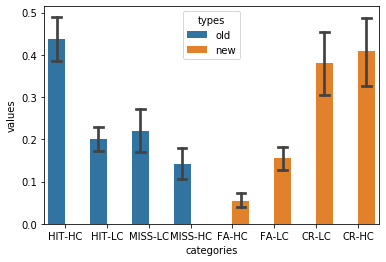

In [4]:
### Prob.7~9 ###
def file_location_ver2(loc) :
    file_list = os.listdir(loc)
    # Create Empty dictionary 
    Sort_8 = {'HIT-HC' : [] , 'HIT-LC' : [] , 'MISS-LC' : [], 'MISS-HC' : [],'FA-HC' : [], 'FA-LC' : [], 'CR-LC' : [], 'CR-HC' :[]}
    keys_8 = np.array(list(Sort_8.keys()))

    for i in range(len(file_list)) :
        # Call the test.txt file by using format
        test1 = pd.read_csv('{}/{}/{}_test.txt'.format(loc,file_list[i],file_list[i]), sep='\t', index_col = False)
        
        # Split it into old and new
        old = test1[test1['Task_Type']==0]
        new = test1[test1['Task_Type']==1]
        
        # Fill in the dict with proper probability values
        old_case = []
        new_case = []
        for t in range(4) :
            old_case.append(len(old[old['Res1']==t+1]))
            new_case.append(len(new[new['Res1']==t+1]))
            Sort_8[keys_8[t]].append(old_case[t]/len(old))
            Sort_8[keys_8[t+4]].append(new_case[t]/len(new))
    # Create 3 lists (Values, Categories, Types) to make proper form of DataFrame for sns.barplot
    values = []
    for k in range(8) :
        values += list(Sort_8[keys_8[k]])
    
    categories = []
    for val in keys_8:
           categories += list([val]*31)

    types = ['old']*len(file_list)*4 + ['new']*len(file_list)*4

    df_new = pd.DataFrame({'values': values, 'categories': categories, 'types': types})
    
    # Check the DataFrame 
    display(df_new.head())
    # Use sns.barplot
    sns.barplot(data=df_new, x='categories', y='values', hue='types' , capsize = 0.2, linewidth=6.5)

file_location_ver2('./DMdata')

,HIT-HC,HIT-LC,MISS-LC,MISS-HC
0,0.888199,0.444444,0.600000,0.000000
1,0.459459,0.347826,0.000000,0.000000
2,0.917808,1.000000,0.666667,0.000000
3,0.555556,0.500000,0.600000,0.367647
4,0.655738,0.000000,0.000000,0.000000


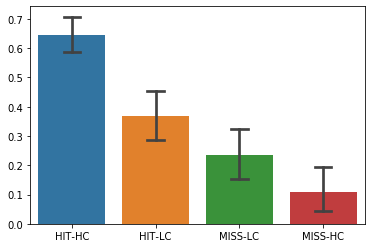

In [5]:
### Prob.10 ###
def score (loc) :
    file_list = os.listdir(loc)
    # Create Empty dictionary for 'old'
    Sort_score = {'HIT-HC' : [] , 'HIT-LC' : [] , 'MISS-LC' : [], 'MISS-HC' : []}
    keys_score = np.array(list(Sort_score.keys()))
    
    for i in range(len(file_list)) :
        # Call the test.txt file and study.txt file by using format
        test = pd.read_csv('{}/{}/{}_test.txt'.format(loc,file_list[i],file_list[i]), sep='\t', index_col = False)
        study = pd.read_csv('{}/{}/{}_study.txt'.format(loc,file_list[i],file_list[i]), sep='\t', index_col = False)
        
        # Set the 'test_old' without whose second respose is 5 and sort it by Object_ID
        test_old = (test[(test['Task_Type']==0) & (test['Res2'] <5)].sort_values('Object_ID')).set_index('Object_ID')
        
        # Import new column 'locID' from study file 
        study = (study.set_index('ObjID')).sort_values('ObjID')
        test_old['locID'] = study['LocID']
        
        # Extract correct rows
        correct = test_old[test_old['Res2']==test_old['locID']]
        
        # Fill in the dict with score values /// When denominator is zero save it as 0 by using if
        score =[]
        for j in range(4) :
            if len(test_old[test_old['Res1']==j+1]) == 0 :
                score.append(0)
            else : 
                score.append(len(correct[correct['Res1']==j+1])/len(test_old[test_old['Res1']==j+1])) 
            Sort_score[keys_score[j]].append(score[j])
            
    # Make dictionary into DataFrame and check it         
    df_score = pd.DataFrame(Sort_score)
    display(df_score.head())
    
    # Use sns.barplot
    sns.barplot(data = df_score, capsize = 0.2)
    
score('./DMdata')

,HIT-HC,HIT-LC,MISS-LC,MISS-HC
0,0.888199,0.444444,0.600000,0.000000
1,0.459459,0.347826,0.000000,0.000000
2,0.917808,1.000000,0.666667,0.000000
3,0.555556,0.500000,0.600000,0.367647
4,0.655738,0.000000,0.000000,0.000000


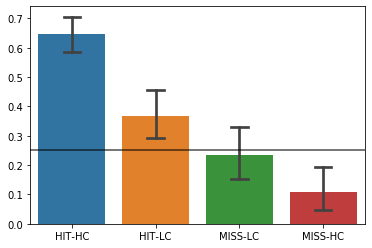

In [7]:
### Prob.11 ###

# Use plt.axhline to draw line indicating chance level
score('./DMdata')
plt.axhline(y=0.25, color = 'black', alpha = 0.7)
